# Lecture 2: second-order ordinary differential equations

We now look at solving second-order ordinary differential equations using a computer algebra system.

To use SymPy, we first need to import it and call `init_printing()` to get nicely typeset equations:

In [1]:
from sympy import *

# This initialises pretty printing
init_printing()
from IPython.display import display

# This command makes plots appear inside the browser window
%matplotlib inline

# Mass-spring-damper system

The differential equation that governs an unforced, single degree-of-freedom mass-spring-damper system is

$$
m \frac{d^{2}y}{dt^{2}} + \lambda \frac{dy}{dt} + ky = 0
$$

To solve this problem using SymPy, we first define the symbols $t$ (time), $m$ (mass), $\lambda$ (damper coefficient) and $k$ (spring stiffness), and the function $y$ (displacement): 

In [2]:
t, m, lmbda, k = symbols("t m lambda k")
y = Function("y")

Note that we mis-spell $\lambda$ as `lmbda` because `lambda` is a protected keyword in Python.

Next, we define the differential equation, and print it to the screen:

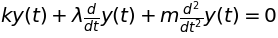

In [3]:
eqn = Eq(m*Derivative(y(t), t, t) + lmbda*Derivative(y(t), t) + k*y(t), 0)
display(eqn)

Checking the order of the ODE:

In [4]:
print("This order of the ODE is: {}".format(ode_order(eqn, y(t))))

This order of the ODE is: 2


and now classifying the ODE:

In [5]:
print("Properties of the ODE are: {}".format(classify_ode(eqn)))

Properties of the ODE are: ('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')


we see as expected that the equation is linear, constant coefficient, homogeneous and second order.

The `dsolve` function solves the differential equation:

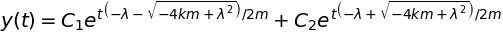

In [6]:
y = dsolve(eqn, y(t))
display(y)

The solution looks very complicated because we have not specified values for the constants $m$, $\lambda$ and $k$. The nature of the solution depends heavily on the relative values of the coefficients, as we will see later. We have four constants because the most general case the solution is complex, with two complex constants having four real coefficients.

Note that the solution is make up of expoential functions and sinusoidal functions. This is typical of second-order ODEs.

# Second order, constant coefficient equation

We'll now solve 

$$
\frac{d^{2}y}{dx^{2}} + 2 \frac{dy}{dx} - 3 y = 0
$$

The solution for this problem will appear simpler because we have concrete values for the coefficients.

Entering the differential equation:

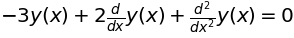

In [7]:
y = Function("y")
x = symbols("x")
eqn = Eq(Derivative(y(x), x, x) + 2*Derivative(y(x), x) - 3*y(x), 0)
display(eqn)

Solving this equation,

In [8]:
y1 = dsolve(eqn)
display(y1)

which is the general solution. As expected for a second-order equation, there are two constants.

Note that the general solution is of the form

$$
y = C_{1} e^{\lambda_{1} x} + C_{2} e^{\lambda_{2} x}
$$

The constants $\lambda_{1}$ and $\lambda_{2}$ are roots of the \emph{characteristic} equation

$$
\lambda^{2} + 2\lambda - 3 = 0
$$

This quadratic equation is trivial to solve, but for completeness we'll look at how to solve it using SymPy. We first define the quadratic equation:

In [9]:
eqn = Eq(lmbda**2 + 2*lmbda -3, 0)
display(eqn)

and then compute the roots:

In [10]:
solve(eqn)

which as expected are the two exponents in the solution to the differential equattion.